In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA,KernelPCA

from sklearn.metrics import fbeta_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn import linear_model
import sweetviz as sv


from sklearn.ensemble import HistGradientBoostingRegressor


def export(Y):
	global modell
	global method

	#len(Y)
	#print(modell.__name__)
	#print(method.__name__)
	filename = modell.__class__.__name__ +"_"+ method.__name__ + ".csv"
	print("Exporting to",filename)
	f = open(filename,'w')

	f.write("Id,Predicted\n")
	for i,val in enumerate(Y):
		f.write("{},{}\n".format(i,val))

	f.flush()
	f.close()

def perform_method_null(modell,train_x,train_y,test_x):
	print("Forgot to select method...exiting")
	exit()


modell = object
method = perform_method_null
train_x = None
train_y = None
test_x = None
test_y = None

#select
#train
#test
#deploy




In [ ]:
def equalize_data(x,y):
	data = pd.concat([x,y.Expected],1)# adding result here remove later step
	data = data.reset_index(drop=True)
	#Test = pd.read_csv('data/X_test.csv')
	#y = pd.read_csv('data/y.csv')

	class_1 = np.where(y.Expected == 1)
	class_0 = np.where(y.Expected == 0)

	class_1 = pd.DataFrame(data,index=class_1[0], columns=data.columns)
	class_0 = pd.DataFrame(data,index=class_0[0], columns=data.columns)


	class_0 = class_0.sample(n = len(class_1))

	frames = [class_1, class_0]

	result = pd.concat(frames)

	x = result.sample(n = len(result))#randomise
	y = pd.DataFrame(x['Expected'])
	x.drop('Expected', inplace=True, axis=1) # we delete the result
	return x,y

def load_data(isdeploy = False):
	print("Loading data..")
	train_x = pd.read_csv('data/X_train.csv')
	train_y = pd.read_csv('data/y_train.csv')
	train_x.drop('Id', inplace=True, axis=1) # staticly drop the id collumn
	train_y.drop('Id', inplace=True, axis=1) # staticly drop the id collumn
	if isdeploy:
		test_x = pd.read_csv('data/X_test.csv')
		test_x.drop('Id', inplace=True, axis=1) # staticly drop the id collumn
		return train_x, test_x, train_y,None # here there are no test_y
	else:
		return train_test_split(train_x, train_y,test_size=0.3, random_state=42)

def SeparateValuesHists(data):
	visited = []
	values = []
	hists = []
	for col in data.columns:
		simbol = col[0:2]
		if simbol in visited:
			continue
		visited.append(simbol)
		#print(simbol)
		sim_cols = []
		#get all similar colum
		for col2 in data.columns:
			if simbol in col2:
				sim_cols.append(col2)
		if len(sim_cols) > 1:
			hists.append(sim_cols)
		else:
			values.append(sim_cols[0])
	return values,hists


def HistNormalize(data):
	print("HistNormalize")
	visited = []

	for col in data.columns:
		simbol = col[0:2]
		if simbol in visited:
			continue
		visited.append(simbol)
		#print(simbol)
		sim_cols = []
		#get all similar colum
		for col2 in data.columns:
			if simbol in col2:
				sim_cols.append(col2)
		
		if len(sim_cols) > 1:
			selected_block = data[sim_cols] 
			selected_block = selected_block.div(selected_block.sum(axis=1),axis = 0)
			data[sim_cols] = selected_block 

	return data 


In [ ]:
def method_normalized_histograms(modell,train_x,test_x,train_y):
	print("Performing ", modell.__class__.__name__ +"_"+ method.__name__ + "...")
	
	print("Preprocess..")
	train_x = train_x.fillna(0)
	test_x = test_x.fillna(0)

	train_x = HistNormalize(train_x)
	test_x = HistNormalize(test_x)

	train_x = train_x.fillna(0) # we do it again do to 0 division
	test_x = test_x.fillna(0)

	values,hists_vec = SeparateValuesHists(train_x)
	hists = []
	for h in hists_vec:
		hists.extend(h)
	

	#select only histograms
	#train_x = train_x[values]
	#test_x = test_x[values]
	

	print("Training..")
	modell.fit(train_x,train_y)
	print("Predicting..")
	Y = modell.predict(test_x)

	return Y
method = method_normalized_histograms


In [ ]:
def method_remove_nan_rows(modell,train_x,test_x,train_y):
	print("Performing ", modell.__class__.__name__ +"_"+ method.__name__ + "...")
	
	print("Preprocess..")
	train_x = train_x.fillna(-1)
	test_x = test_x.fillna(-1)

	train_x = HistNormalize(train_x)
	test_x = HistNormalize(test_x)

	train_x = train_x.fillna(-1) # we do it again do to 0 division
	test_x = test_x.fillna(-1)

	values,hists_vec = SeparateValuesHists(train_x)
	hists = []
	for h in hists_vec:
		hists.extend(h)
	

	#select only histograms
	#train_x = train_x[values]
	#test_x = test_x[values]
	

	print("Training..")
	modell.fit(train_x,train_y)
	print("Predicting..")
	Y = modell.predict(test_x)

	return Y
method = method_remove_nan_rows

In [ ]:
def method_no_histogram_pca(modell,train_x,test_x,train_y):
	print("Performing ", modell.__class__.__name__ +"_"+ method.__name__ + "...")
	
	print("Preprocess..")

	values,_ = SeparateValuesHists(train_x)
	
	#select only histograms
	train_x = train_x[values]
	test_x = test_x[values]


	train_x = train_x.fillna(-1)
	test_x = test_x.fillna(-1)
	
	pca = PCA(n_components=70)
	pca = pca.fit(train_x)
	train_x = pca.transform(train_x)
	test_x = pca.transform(test_x)
	#est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
	#est.fit(train_x)
	#train_x = est.transform(train_x)
	plt.subplot(projection='3d')
	#plt.scatter(train_x [:,0],train_x [:,1],c=train_y.Expected)
	plt.scatter(train_x [:,0],train_x [:,1],train_x [:,2],c=train_y.Expected)
	#plt.subplot(1,2,2,projection='3d')
	#plt.scatter(X [:,3],X [:,4],X [:,5],c=train_y.Expected)
	plt.show()
	

	print("Training..")
	modell.fit(train_x,train_y)
	print("Predicting..")
	Y = modell.predict(test_x)

	return Y
method = method_no_histogram_pca

In [41]:
def method_visualize_normalized_pca_histograms(modell,train_x,test_x,train_y):
	print("Performing ", modell.__class__.__name__ +"_"+ method.__name__ + "...")
	
	print("Preprocess..")
	train_x = train_x.fillna(-1)
	test_x = test_x.fillna(-1)

	train_x = HistNormalize(train_x)
	test_x = HistNormalize(test_x)

	train_x = train_x.fillna(-1) # we do it again do to 0 division
	test_x = test_x.fillna(-1)

	values,hists = SeparateValuesHists(train_x)

	global test_y
	for h in hists:
		#select only histograms
		X = train_x[h[4:]]
		TX = test_x[h[4:]]

		pca = PCA(n_components=6, svd_solver='full')
		pca = pca.fit(X)
		X = pca.transform(X)
		TX = pca.transform(TX)
		#est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
		#est.fit(X)
		#Xt = est.transform(X)


		#plt.subplot(projection='3d')
		plt.subplot(1,2,1,projection='3d')
		plt.scatter(X [:,0],X [:,1],X [:,2],c=train_y.Expected)
		plt.subplot(1,2,2,projection='3d')
		plt.scatter(X [:,3],X [:,4],X [:,5],c=train_y.Expected)
		plt.show()
		
		#modell.fit(X,train_y)
		#Y = modell.predict(TX)
		#print("F3,",fbeta_score(test_y, Y, average='binary', beta=3))
		
		#plt.subplot(projection='3d')
		#plt.scatter(X [:,6],X [:,7],X [:,8],c=train_y.Expected)
		#plt.show()
		#return
		

	print("Training..")
	modell.fit(train_x,train_y)
	print("Predicting..")
	Y = modell.predict(test_x)

	return Y
method = method_visualize_normalized_pca_histograms


In [ ]:
def method_each_hist_diff_classifier(_main_modell,train_x,test_x,train_y):
	print("Performing ", method.__name__ + "...")
	
	print("Preprocess..")
	train_x = train_x.fillna(0)
	test_x = test_x.fillna(0)

	train_x = HistNormalize(train_x)
	test_x = HistNormalize(test_x)

	train_x = train_x.fillna(0) # we do it again do to 0 division
	test_x = test_x.fillna(0)

	values,hists = SeparateValuesHists(train_x)
	Y_vec = [] # stores the outputs

	#TODO 100 vals classifier
	X = train_x[values]
	TX = test_x[values]
	modell = GaussianNB()
	modell.fit(X,train_y)
	Y = modell.predict(TX)
	Y_t = modell.predict(X)
	Y_vec = pd.DataFrame(Y,columns =['vals'])
	Y_vec_train = pd.DataFrame(Y_t,columns =['vals'])
	i = 0
	for h in hists:
		i+=1
		#select only histograms
		X = train_x[h]
		TX = test_x[h]

		pca = PCA(n_components=9)
		pca = pca.fit(X)
		X = pca.transform(X)
		TX = pca.transform(TX)

		modell = KNeighborsClassifier(3,algorithm="auto") 
		modell.fit(X,train_y)
		Y = modell.predict(TX)
		Y_t = modell.predict(X)
		Y_vec = pd.concat([Y_vec,pd.DataFrame(Y,columns =[str(i)])],1)
		Y_vec_train = pd.concat([Y_vec_train,pd.DataFrame(Y_t,columns =[str(i)])],1)

		#est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
		#est.fit(X)
		#Xt = est.transform(X)


		#plt.subplot(projection='3d')
		#plt.scatter(Xt [:,0],Xt [:,1],c=train_y.Expected)
		#plt.scatter(Xt [:,0],Xt [:,1],Xt [:,2],c=train_y.Expected)
		#plt.subplot(1,2,2,projection='3d')
		#plt.scatter(X [:,3],X [:,4],X [:,5],c=train_y.Expected)
		#plt.show()
		
		#modell.fit(X,train_y)
		#Y = modell.predict(TX)
		#print("F3,",fbeta_score(test_y, Y, average='binary', beta=3))
		
		#plt.subplot(projection='3d')
		#plt.scatter(X [:,6],X [:,7],X [:,8],c=train_y.Expected)
		#plt.show()
		#return

	
	

	print("Training..")
	_main_modell.fit(Y_vec_train,train_y)
	print("Predicting..")
	Y = _main_modell.predict(Y_vec)

	return Y
method = method_each_hist_diff_classifier

Experiment pipline

In [ ]:
for modell in classifiers:
	print("Experiment...")
	train_x, test_x, train_y, test_y = load_data(False)
	train_x,train_y = equalize_data(train_x,train_y)
	if modell is object:
		raise Exception("Forgot to select a modell..")
	Y = method(modell,train_x, test_x, train_y)
	
	#print("Evalueting")
	
	#print("acc,",acc(test_y,Y))
	#print("bas,",bas(test_y,Y))
	#pcm(modell,test_x,test_y)
	error = 0
	for i in range(len(test_y)):
		if test_y._values[i] != Y[i]:
			#print(test_y._values[i],Y[i],Y_test_proba[i])
			error += 1 
	#print("Error count =",error,"/",len(test_y))
	print("F3,",fbeta_score(test_y, Y, average='binary', beta=3))
	recall = recall_score(test_y,Y)
	precision = precision_score(test_y,Y)
	#print("precision,",precision)
	#print("recall,",recall)
	#print("f_measure",f_measure(recall,precision))
	print("-----------------------------------")

Experiment...
Loading data..


C:\Users\Schmidtlacus\AppData\Local\Temp\ipykernel_7980\1580141290.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([x,y.Expected],1)# adding result here remove later step


Performing  QuadraticDiscriminantAnalysis_method_visualize_normalized_pca_histograms...
Preprocess..
HistNormalize
HistNormalize


InvalidIndexError: (slice(None, None, None), 0)

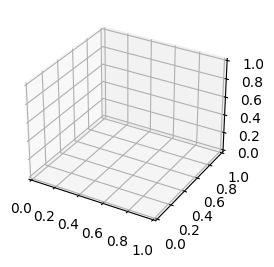

In [42]:
print("Experiment...")
train_x, test_x, train_y, test_y = load_data(False)
train_x,train_y = equalize_data(train_x,train_y)
#test_x,test_y = equalize_data(test_x,test_y)
if modell is object:
	raise Exception("Forgot to select a modell..")
Y = method(modell,train_x, test_x, train_y)

print("Evalueting")

#print("acc,",acc(test_y,Y))
#print("bas,",bas(test_y,Y))
#pcm(modell,test_x,test_y)
error = 0
for i in range(len(test_y)):
	if test_y._values[i] != Y[i]:
		#print(test_y._values[i],Y[i],Y_test_proba[i])
		error += 1 
print("Error count =",error,"/",len(test_y))
print("F3,",fbeta_score(test_y, Y, average='binary', beta=3))
recall = recall_score(test_y,Y)
precision = precision_score(test_y,Y)
print("precision,",precision)
print("recall,",recall)
#print("f_measure",f_measure(recall,precision))



Deployment pipeline

In [ ]:
print("Deploy...")
train_x, test_x, train_y, test_y = load_data(True)
#train_x,train_y = equalize_data(train_x,train_y)
if modell is object:
	print("Forgot to select a modell, exiting..")
	exit()
Y = method(modell,train_x, test_x, train_y)
export(Y)



In [ ]:
modell = DTC(random_state=42,criterion = "entropy",min_samples_split = 50,max_features = "sqrt")#"entropy"  #log_loss #gini

In [ ]:
modell = GaussianNB()

In [ ]:
modell = KNeighborsClassifier(3,algorithm="auto") 

In [ ]:
modell = RandomForestClassifier(n_estimators=7,bootstrap=True)

In [ ]:
modell = KNeighborsClassifier(3)

In [ ]:
classifiers = [
	KNeighborsClassifier(3),
	#SVC(kernel="linear", C=0.025),
	#SVC(gamma=2, C=1),
	#GaussianProcessClassifier(1.0 * RBF(1.0)),
	DTC(max_depth=5),
	RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
	MLPClassifier(alpha=1, max_iter=1000),
	AdaBoostClassifier(),
	GaussianNB(),
	QuadraticDiscriminantAnalysis()]

In [ ]:
col = x_train.columns

new_cols = []
for c in col:
	tag = c.split('_')[0]
	count=0
	for name in col:
		if tag in name:
			count+=1
	if count == 1:
		new_cols.append(c) 
		#print(c)
	#if [c==x for x in col]

train_data = x_train[new_cols]
test_data = x_test[new_cols]

print(len(new_cols))

unknown_data = unknown[new_cols]

In [ ]:
print(len(x_train.columns))
#print(x_train.columns)
#does the same as next
#x_train.nunique()
#print("isnasum ",x_train.isna().sum())
headers = []

for col in x_train.columns:
	#if not "000" in col:
		#print(col,(x_train[col] == 0).sum())
		#continue
		#print(col)
	if (x_train[col] == 0).sum() < len(x_train)/2:
		#print(col,(x_train[col] == 0).sum(),len(x_train[col].value_counts()))
		headers.append(col)

#for col in x_train.columns:
#	if len(x_train[col].value_counts()) < len(x_train)/2:
#		headers.append(col)
		#print(col,len(x_train[col].value_counts()))


train_data = x_train[headers]
test_data = x_test[headers]

print(len(headers))

unknown_data = unknown[headers]


In [ ]:
#dont run this
train_data = x_train
test_data = x_test
unknown_data = unknown

Selecting modell with parameter

In [ ]:
modell = DTC(random_state=42,criterion = "entropy",min_samples_split = 50,max_features = "sqrt")#"entropy"  #log_loss #gini

Classification model tester

In [ ]:

modell
clf_dtc.fit(train_data,train_res)
predicted_Y = clf_dtc.predict(test_data)
#Y_test_proba = clf_dtc.predict_proba(test_data)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]

print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
pcm(clf_dtc,test_data,test_res)
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)
#print("f_measure",f_measure(recall,precision))

predicted_Y = clf_dtc.predict(unknown_data)

In [ ]:

clf_dtc = DTC(random_state=42,criterion = "entropy",min_samples_split = 50,max_features = "sqrt")#"entropy"  #log_loss #gini
clf_dtc.fit(train_data,train_res)
predicted_Y = clf_dtc.predict(test_data)
#Y_test_proba = clf_dtc.predict_proba(test_data)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]

print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
pcm(clf_dtc,test_data,test_res)
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)
#print("f_measure",f_measure(recall,precision))

predicted_Y = clf_dtc.predict(unknown_data)


In [ ]:
clf_knc = KNeighborsClassifier(2,algorithm="auto") 
#DTC(random_state=42,criterion = "gini",min_samples_split = 50,max_features = "sqrt")#"entropy"  #log_loss

clf_knc.fit(train_data,train_res)
predicted_Y = clf_knc.predict(test_data)

print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)
pcm(clf_knc,test_data,test_res)


#predicted_Y = clf.predict(Test)

In [ ]:
clf = RandomForestClassifier(n_estimators=100,bootstrap=True)
clf.fit(train_data,train_res)
predicted_Y = clf.predict(test_data)
Y_test_proba = clf.predict_proba(test_data)[:,1]

print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)
pcm(clf,test_data,test_res)
predicted_Y = clf.predict(unknown_data)

In [ ]:
pca = PCA(n_components=10)
pca = pca.fit(train_data)
train_pca = pca.transform(train_data)

test_pca = pca.transform(test_data)

#Real_pca = pca.transform(Test)

#reg = linear_model.BayesianRidge()

#plt.scatter(train_pca)
plt.scatter(train_pca[:,1],train_pca[:,6],c=train_res)
plt.show()

#clf = DTC(random_state=42,criterion = "gini",min_samples_split = 100,max_features = "sqrt")#"entropy"  #log_loss
#clf = clf.fit(train_pca,test_res)
#reg = reg.fit(train_pca,y_train)

#print(reg.coef_)

#predicted_Y = clf.predict(test_pca)
#predicted_Y = reg.predict(test_pca)
#Y_test_proba = clf.predict_proba(test_pca)[:,1]


#print(acc(test_res,predicted_Y))

#print(bas(test_res,predicted_Y,adjusted=True))
#print(bas(test_res,predicted_Y,adjusted=False))

#pcm(clf,train_pca,y_train)


clf = RandomForestClassifier(n_estimators=20)
clf.fit(train_pca,train_res)
predicted_Y = clf.predict(test_pca)
Y_test_proba = clf.predict_proba(test_pca)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]


print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)


pcm(clf,test_pca,test_res)

Real_pca = pca.transform(unknown_data)

predicted_Y = clf.predict(Real_pca)



In [ ]:
clf_dtc = GaussianNB()

clf_dtc.fit(x_train,train_res)
predicted_Y = clf_dtc.predict(x_test)
Y_test_proba = clf_dtc.predict_proba(x_test)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]

print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)

pcm(clf_dtc,test_data,test_res)


#predicted_Y = clf_dtc.predict(unknown_data)





In [ ]:
#predicted_Y = clf.predict(Real_pca)
print(len(predicted_Y), sum(predicted_Y))

In [ ]:
len(predicted_Y)

f = open("schmidt_laszlo_gnb.csv",'w')

f.write("Id,Predicted\n")
for i,val in enumerate(predicted_Y):
	f.write("{},{}\n".format(i,val))

f.flush()
f.close()

In [ ]:
pca = PCA(n_components=2)
pca = pca.fit(train)
a = pca.transform(train)
print(pca.explained_variance_ratio_)

print(len(train),",",len(a))
#plt.scatter(a,y_test)
#plt.show()

